In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from pulser.devices import Chadoq2
from pulser import Pulse, Sequence, Register

from src.mapping import create_coordinates
from src.qubo_tools import build_qubo_matrix

In [13]:
import warnings
warnings.filterwarnings("ignore")

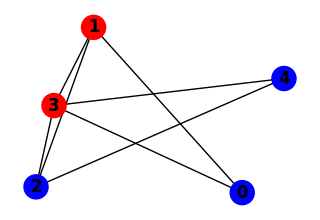

In [14]:
Graph_Example_encoding  = nx.Graph()
Graph_Example_encoding .add_edges_from([[0,1],[1,2], [1,3], [0,3],[3,2],[3,4],[2,4]])

plt.figure(figsize=(3,2)) 
nx.draw(Graph_Example_encoding ,with_labels=True,node_color = ['b','r','b','r','b'],font_weight='bold')

In [15]:
Q_example_encoding = build_qubo_matrix(Graph_Example_encoding)
Q_example_encoding

array([[-2.,  2.,  0.,  2.,  0.],
       [ 0., -3.,  2.,  2.,  0.],
       [ 0.,  0., -3.,  2.,  2.],
       [ 0.,  0.,  0., -4.,  2.],
       [ 0.,  0.,  0.,  0., -2.]])

In [16]:
coords_example = create_coordinates(Q_example_encoding)
coords_example

array([[ 5.24411836, 12.9150815 ],
       [ 8.71185464,  2.43707612],
       [ 1.37077413, -5.80555067],
       [-2.09555962,  4.67203285],
       [-9.43722001, -3.56925211]])

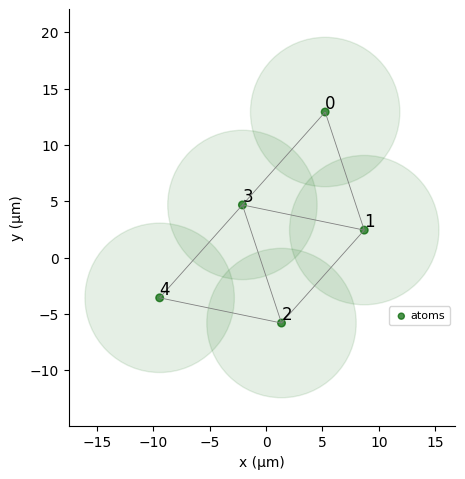

In [17]:
qubits_example = dict(enumerate(coords_example))
reg_example = Register(qubits_example)
reg_example.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)